# CPSC 4300/6300-001 Applied Data Science (Fall 2020)

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Joshua Lin"
COLLABORATORS = ""

# CPSC4300/6300-001 Problem Set #2

In this problem set, you will work with some real datasets using tools in the Python data science software stack. The purpose of this problem set is to help you getting familiar with these tools for data preparation and analysis.

# Part A: Wrangling the Bank Marketing Data Set

In many times, the data sets you have collected may be not immediately avaialble for training a machine learning model. Rather, you have to clean and transfrom the data into a target data frame which at least has the following properties:

1. Each row describes a single object.
2. Each column describes a property of that object.
3. Columns are numeric whenever appropriate. 
4. Columns contains atomic properties.

In this part, you will work with the Bank Marketing Data Set collected in the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Particularly, you will performing the following tasks:

+ Adding an index fields
+ Changing misleading fields
+ Representing categorial data as numerical data
+ Standardizing the numeric fields
+ Identifying outliers

## Set up the notebook enviornment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import os
import json

sns.set()
%matplotlib inline

In [3]:
def download(url, file_path):
    """download fetches a file from url and saves it to a location specified by file_path
    """
    r = requests.get(url)
    with open(file_path, "wb") as f:
        f.write(r.content)

# The Bank Marketing Data Set

In Part A, you should use the `bank-addition.csv` sample dataset, which consists of 10% of the full dataset of 41,188 examples. As a practical choice, it's more efficient to use a scaled down version of the data set in the exploration and development stage and then use the full data set when you actually train and evaulate the model.

Because the UCI dataset is stored as a zip file, for simiplicity, I have prepared the csv files at https://webapp02-ext.palmetto.clemson.edu/dsci/datasets/bank_markerting_uci/bank-additional.csv.


# Question 1. Get the data (3 points)

Read the data into a pandas DataFrame object and assign the object to a variable named `bank`.

Hint: you may first download the data and examine the format of the data before reading the data into the data frame. The columns in the data file may be separated with a character which is not ','.

In [4]:
# YOUR CODE HERE
#raise NotImplementedError()
bank = pd.read_csv("https://webapp02-ext.palmetto.clemson.edu/dsci/datasets/bank_markerting_uci/bank-additional.csv", sep=";")
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
assert isinstance(bank, pd.DataFrame)

In [6]:
assert bank.shape == (4119, 21)

# Question 2. Examine the data (10 points)

Once you load a dataset into a data frame, the next step is to understand the basic properties of the data such as the size of the data set, the data type of each column, and the range or unique values of each column.

Pandas's DataFrame object comes with numerous attributes or methods to quickly show properties of the data represented in a data frame.

1. __Write a Python statement to show the first two rows of the data. Assign the results to a variable `top_2_rows`__. (2 points)

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
top_2_rows = bank.iloc[:2]

In [8]:
assert isinstance(top_2_rows, pd.DataFrame) and top_2_rows.shape[0] == 2

2. __Which of the following statements print a concise summary of a data including the name, non-null items count and data of all columns, ?__ (2 points)

```
    bank.dtypes
    bank.info()
    bank.shape
    bank.describe()
    bank.summary()
 ```
 Write the statement in the answer cell.

In [9]:
# YOUR CODE HERE
#raise NotImplementedError()
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

3. __Write a Python statement to print the descriptive statistics of the data, assign the results to `summary_statistics`__. (2 points)

In [10]:
# YOUR CODE HERE
#raise NotImplementedError()
summary_statistics = bank.describe()
summary_statistics

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
assert '50%' in summary_statistics.index and 'emp.var.rate' in summary_statistics.columns

4. __Write a statement to count non-NA cells for each column. Assign the result to `bank_counts`, which should be of a Series data type__. (2 points)

In [12]:
# YOUR CODE HERE
#raise NotImplementedError()
bank_counts = bank.count()

In [13]:
assert bank_counts.__class__.__name__ == 'Series'
assert bank_counts['poutcome'] == 4119

5. __Count the distinct values for all columns. Assign the results to a variable `distinct_values`__. (2 points)

In [14]:
# YOUR CODE HERE
#raise NotImplementedError()
distinct_values = bank.nunique()
#distinct_values

In [15]:
assert isinstance(distinct_values, pd.Series) and distinct_values['marital'] == 4 

In [16]:
"""Another hidden test"""

'Another hidden test'

# Question 3. Visual Summary of the Data (11 points)

Data visualization provides an intuitive summary of the data. Several types of plots like histogram, bar charts, and pair plots can be very useful when exploring the data.

1. __Create a plot of size $16\times12$ with consists of teh histogram of `age`, `campaign`, `pdays`, and `ons.price.idx`__. (3 points) 

Hint: you can use a DataFrame object's `hist()` method.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0457e09f10>,
      dtype=object)

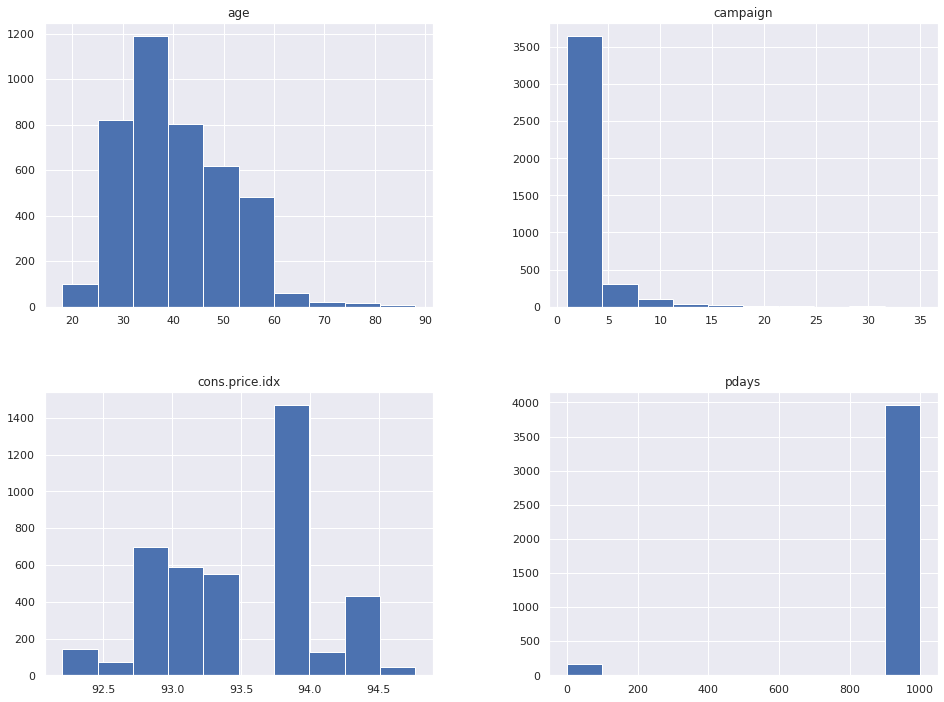

In [17]:
# YOUR CODE HERE
#raise NotImplementedError()
bank.hist(column=["age", "campaign", "pdays", "cons.price.idx"], figsize=(16,12))

Pairplot provides a snapshot of the relations between numeric variables.

2. __Use the Seaborn's pairplot function to create a pairplot of the 'age', 'compaign', 'pdays', and 'ons.price.idx'.__ (3 points)

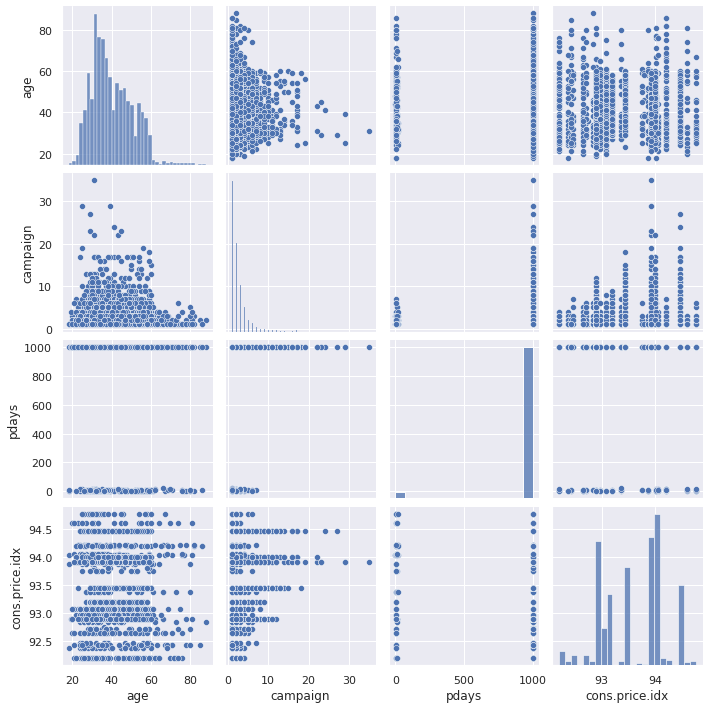

In [18]:
# YOUR CODE HERE
#raise NotImplementedError()
sns.pairplot(bank, vars=['age','campaign','pdays', 'cons.price.idx'])

For categorical data, which you will explore in more depth soon, you can create a grid of bar charts. If you could not find an available method to plot a grid of bar charts, you can create a grid of subplots and then add the bar charts to the grid. 

3. __Using the above method, create a $3\times2$ grid of bar charts for 'job', 'marital', 'education', 'default', 'housing' and 'loan'.__ (5 points)

You should also set the title to the variable name for each bar chart.

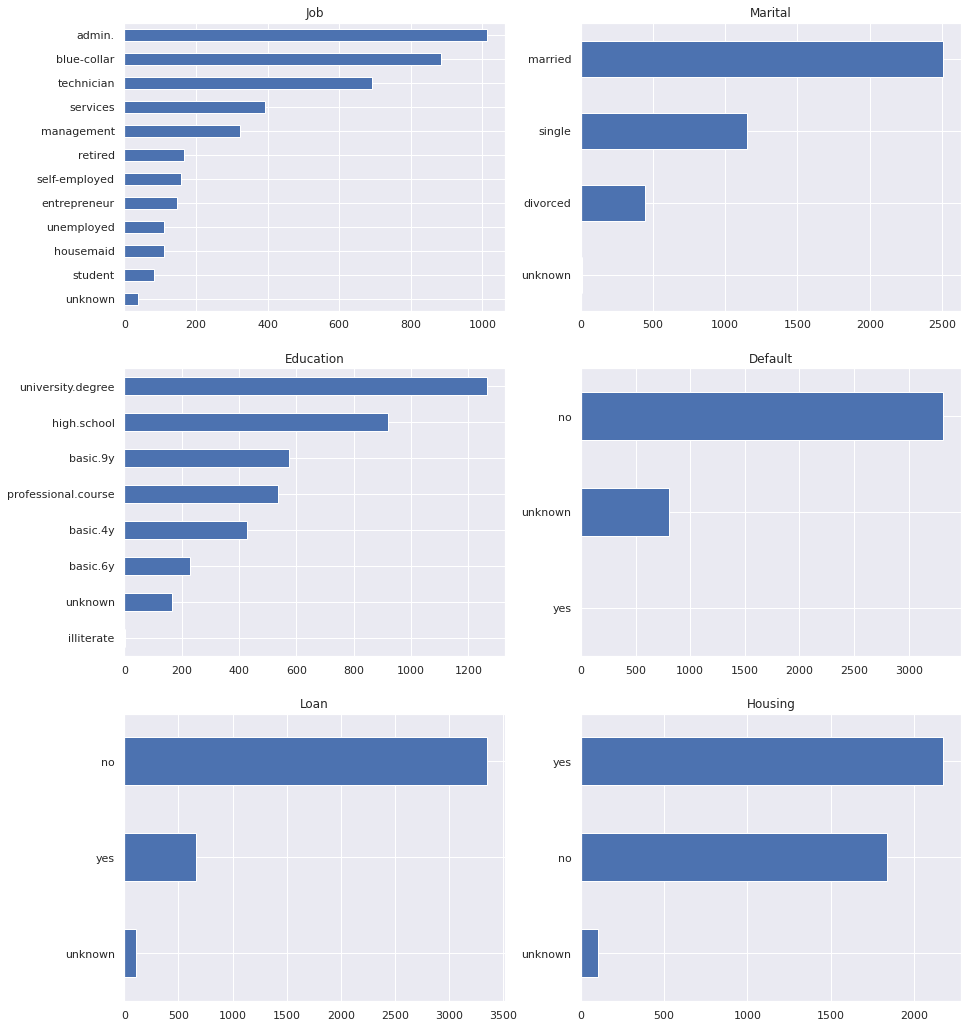

In [19]:
figure, ax = plt.subplots(3, 2, figsize=(15, 18))
ax1 = ax.reshape(6)
for i,col in enumerate(['job']):
    bank[col].value_counts(ascending=True).plot.barh(ax=ax1[i])
    ax1[i].set_title(col.capitalize())
for i,col in enumerate(['marital']):
    bank[col].value_counts(ascending=True).plot.barh(ax=ax1[i+1])
    ax1[i+1].set_title(col.capitalize())
for i,col in enumerate(['education']):
    bank[col].value_counts(ascending=True).plot.barh(ax=ax1[i+2])
    ax1[i+2].set_title(col.capitalize())
for i,col in enumerate(['default']):
    bank[col].value_counts(ascending=True).plot.barh(ax=ax1[i+3])
    ax1[i+3].set_title(col.capitalize())
for i,col in enumerate(['loan']):
    bank[col].value_counts(ascending=True).plot.barh(ax=ax1[i+4])
    ax1[i+4].set_title(col.capitalize())
for i,col in enumerate(['housing']):
    bank[col].value_counts(ascending=True).plot.barh(ax=ax1[i+5])
    ax1[i+5].set_title(col.capitalize())
# YOUR CODE HERE
#raise NotImplementedError()

# Question 4. Index Field

An index field associates a unique ID with each row of the data set. Given an index field, you can quickly locate and track a row even the data set will go through numerous sorting, partition, or reset the default index. You may have already observed that the bank data does not have an index field. 

1. __Write some statements to add an index column to bank data set and rearrange the column names so that the index will be the first column. The value of the index of a row will be the row number (starting from 0) in the original data set.__ (5 points)

In [20]:
# YOUR CODE HERE
#raise NotImplementedError()
bank['index'] = pd.Series(range(0,bank.shape[0]))
cols = bank.columns.tolist()
cols = cols[-1:] + cols[:-1]
bank = bank[cols]

bank.head(2)

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,1,39,services,single,high.school,no,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [21]:
assert 'index' in bank.columns and bank.columns[0] == 'index'

In [22]:
assert bank.shape[1] == 22

In [23]:
assert bank["index"].nunique() == bank.shape[0]

# Question 5. Change Misleading Field Values (10 points)

When you are working with a data set, you should ensure all the data values making sense. It is a good practice to provide a data catalog for all data sets so that people use the data can understand what the data represent. You can find a description of the bank marketing data set at UCI's web site (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) or the `bank_additional_names.txt` (a copy of the file is available at bank-addition is at https://www.palmetto.clemson.edu/dsci/datasets/bank_markerting_uci/bank-additional-names.txt).

You can plot columns of a DataFrame object to visually spot whether the dataset contains some abnormal or misleading values.

Now, plot the histogram of the `pdays` column. Does the histogram looks reason to you?

From the data description, you can find the following line:
```
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
```

Thus, the value `999` in the `pdays` column is misleading, and you should replace it with some sensible value to indicate that the data is missing or misleading. For numeric data types, `numpy` provides a constant `np.NaN` for that purpose.

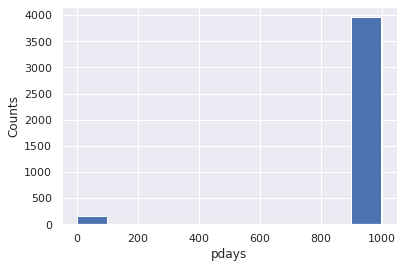

In [24]:
ax = bank['pdays'].hist(bins=10)
ax.set_xlabel("pdays")
ax.set_ylabel("Counts")
plt.show()

1. __Write some code to change the value `999` to `np.NaN` in the `pdays` column.__ (3 points)

In [25]:
# YOUR CODE HERE
#raise NotImplementedError()
bank['pdays'] = bank['pdays'].replace({999: np.NaN})

In [26]:
values = bank['pdays'].unique()
assert 999 not in values

In [27]:
assert any(np.isnan(values))

2. __Now write some code to plot the histogram of `pday` column after replacing the `pdays` columns.__ (2 points)

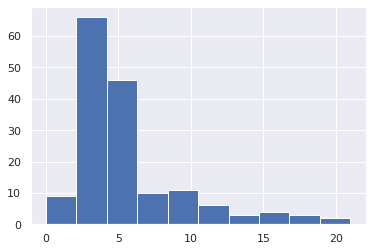

In [28]:
# YOUR CODE HERE
#raise NotImplementedError()
hist = bank['pdays'].hist(bins=10)

3. __Write a statement to return a Series containing counts of unique values of the `pdays` column. Assign the results to a variable `pdays_value_counts`.__ (3 points)

In [29]:
# YOUR CODE HERE
#raise NotImplementedError()
pdays_value_counts = bank['pdays'].value_counts()

In [30]:
assert isinstance(pdays_value_counts, pd.Series)
assert len(pdays_value_counts)

4. __Write a statement to print the number of np.NaN values in the `pdays` column. Asssign the results to `pdays_nan_count`.__ (2 points)

In [31]:
# YOUR CODE HERE
#raise NotImplementedError()
pdays_nan_count = bank['pdays'].isna().sum()

## Question 6. Explore Categorical Data (10 points)

Categorical variables represent types of data which may be divided into groups. Examples of categorical variables are weather types, job types, race, sex, age group, and educational level. 

There are two major classes of categorical data, nominal and ordinal. 

+ For __nominal categorical__ data, there is no concept of ordering among the values of the attributes. For example, the types of weather are nominal data. There is no concept of ordering among the weather types. Similarly, movie, music and video game genres, country names, food and cuisine types, football player positions are examples of nominal categorical attributes.

+ For __ordinal categorical__ data, you can place the attributes into some order or scale. For example, you can rate the happiness on a scale of 1-10. Similarly, shoe sizes, education levels, income levels, and hurricane categories are examples of ordinal data.

1. __Write some code to find all columns which contain categorical data. Assign the results to a variable `cat_cols`.__ (2 points)

Hint: `dt.dtypes` returns the dtype of all columns and a categorical data column's dtype is 'object'.

In [32]:
# YOUR CODE HERE
#raise NotImplementedError()
cat_cols = bank.dtypes[bank.dtypes == "object"].index
cat_cols
#cat_cols has 11 columns which is the 11 you wanted to see.
#had to limit it to 11 rows to pass the assert len(cat_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [33]:
assert len(cat_cols) == 11 and 'marital' in cat_cols and 'contact' in cat_cols

You can convert a column in a data frame into a categorical data using the Series's astype method. For example, the following code convert the `job` column into a category data.

In [34]:
bank['job'] = bank['job'].astype('category')
bank['job'].dtype

CategoricalDtype(categories=['admin.', 'blue-collar', 'entrepreneur', 'housemaid',
                  'management', 'retired', 'self-employed', 'services',
                  'student', 'technician', 'unemployed', 'unknown'],
                 ordered=False)

2. __Write some code to convert the dtype of all the categorical columns to CategoricalDtype.__ (2 points)

In [35]:
# YOUR CODE HERE
#raise NotImplementedError()
bank = bank.astype({"job": "category", "marital": "category", "education": "category", "default": "category", "housing": "category", "loan": "category", "contact": "category", "month": "category", "day_of_week": "category", "poutcome": "category", "y": "category"})
bank.dtypes

index                int64
age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays              float64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

In [36]:
assert all(bank.dtypes[bank.dtypes != 'object']) and bank.dtypes['education'] == 'category'

3. __Write some code to print the value counts of the `job` attribute.__ (2 points)

In [37]:
# YOUR CODE HERE
#raise NotImplementedError()
bank['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

4. __Create a horizontal bar plot from the sorted value counts of the job attribute.__ (3 points)

Hint: You can use the Series.plot.barh function to plot a Series data.

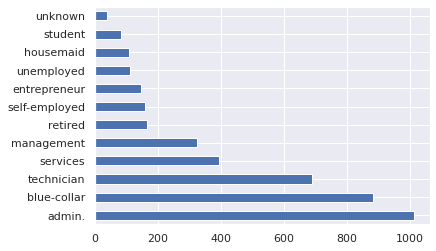

In [38]:
# YOUR CODE HERE
#raise NotImplementedError()
bank['job'].value_counts().plot.barh()

Analysis of categorical data generally involves the use of data tables. A two-way table or cross tabulation represents categorical data by counting the number of observations that fall into each group for two variables, one divided into rows and the other divided into columns. 

5. __Use the pandas.crosstab method to compute a simple cross tabulation of the `job` and `marital` columns.__ (3 points)

In [39]:
# YOUR CODE HERE
#raise NotImplementedError()
table = pd.crosstab(bank['job'], bank['marital'])
table

marital,divorced,married,single,unknown
job,,,,
admin.,112,513,384,3
blue-collar,66,634,183,1
entrepreneur,22,107,19,0
housemaid,18,77,15,0
management,42,233,49,0
retired,31,121,11,3
self-employed,16,94,48,1
services,48,244,100,1
student,0,3,79,0


One useful graphical tool for analyzing two categorical variables is a stacked bar graph. You can create a stacked bar graph using the following python code.

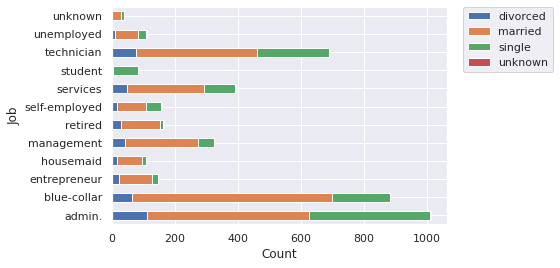

In [40]:
df = pd.crosstab(bank['job'], bank['marital'])
ax = df.plot.barh(stacked=True)
ax.set_xlabel('Count')
_ = ax.set_ylabel('Job')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

The above figure is not intuitive to show the proportions of `marital` status for each job. 

6. __Write some code based on the above example to plot a stacked bar plot of the percentage of the `marital` status for each job type.__ (5 points)

Hint: you can create a new data frame by dividing the `marital` status counts for each job type by the total counts of that job. The figure should look like below but does not need to be identical.

![Job type percentage by marital status](https://www.palmetto.clemson.edu/dsci/figures/ps02a_job_count.png)


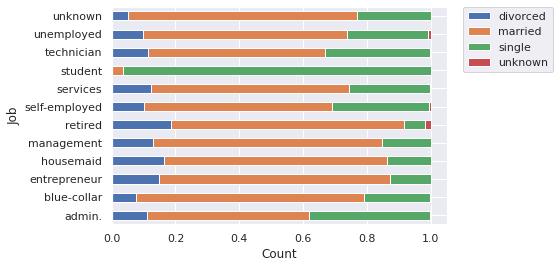

In [41]:
# YOUR CODE HERE
#raise NotImplementedError()
table2 = table.transpose().sum()
for col in table :
    for row in table.index :
        table.at[row,col] = table[col][row]/table2[row]
ax = table.plot.barh(stacked=True)
ax.set_xlabel('Count')
_ = ax.set_ylabel('Job')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Question 7. Encode Categorical Data

To feed the data into a machine learning model, we need to convert categorical data to meaningful numerical features. Simply converting categories to numerical labels may not be sufficient because it is meaningless to compare two genres with different numeric value. 

There are several encoding schemes to transform categorical attributes to meaningful features. Some of them are shown below:

| Encoder  | Description |
| ------- -| :----------- |
| Ordinal  | Convert textual labels to integer lebels 1 through k.              |
| OneHot   | Create multiple binary columns with each column representing the presence of each value          |
| Binary   | Convert each integer to binary digits                              |
| BaseN    | Ordinal, Binary, or higher encoding                                |
| Hashing  | Like OneHot but has fewer dimensions, possible infomation loss due to collisions |

The following code creates an one-hot encoding for the marital column.

In [42]:
pd.get_dummies(bank.marital, prefix='marital')

,marital_divorced,marital_married,marital_single,marital_unknown
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
4114,0,1,0,0
4115,0,1,0,0
4116,0,0,1,0
4117,0,1,0,0


1. __Convert the housing column to a set of binary columns using one-hot encoding and add those columns to the bank data frame. The names of the new columns should the prefix of 'hoursing_'.__ (5 points)

You also shoul dkeep the target feature (i.e., the column y as the last column of thebank data frame).

In [43]:
# YOUR CODE HERE
#raise NotImplementedError()
one_hot = pd.get_dummies(bank.housing, prefix='housing')
bank = bank.drop('housing',axis = 1)
bank = bank.join(one_hot)
bank = bank[[c for c in bank if c not in ['y']] + ['y']]
bank.head(2)

,index,age,job,marital,education,default,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housing_no,housing_unknown,housing_yes,y
0,0,30,blue-collar,married,basic.9y,no,no,cellular,may,fri,...,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,0,1,no
1,1,39,services,single,high.school,no,no,telephone,may,fri,...,nonexistent,1.1,93.994,-36.4,4.855,5191.0,1,0,0,no


In [44]:
assert bank.columns[-1] == 'y'

In [45]:
assert 'housing_yes' in bank.columns

In [46]:
assert all(bank.loc[0, ['housing_yes', 'housing_no']].values == np.array([1, 0]))

__Transform the education data into a new column called "education_numeric".__

The education field is an ordinal categorical data. We know that university_degree represents more education than basic.4yr. We should provide this information to the model as well as the learning algorithms. We can transform the data values of ordinal categorical data into numeric values, where it is clear that one value is larger than another. When you are doing this, you should proceed with care to ensure the relative differences among the various categories are preserved.


```
edu_map = {
     'illiterate': 0,
     'basic.4y': 4,
     'basic.6y': 6,
     'basic.9y': 9,
     'high.school': 12,
     'professional.course': 12,
     'university.degree': 16,
     'unknown': np.NaN,
}
```

2. __Use the above map to create a new column called 'education_numeric' whose values map those in the 'education' column for each row of the samples in the bank dataset.__ (5 points)

In [47]:
# YOUR CODE HERE
#raise NotImplementedError()
edu_map = {'illiterate': 0,'basic.4y': 4,'basic.6y': 6,'basic.9y': 9,'high.school': 12,'professional.course': 12,'university.degree': 16,'unknown': np.NaN,}
bank['education_numeric'] = bank['education'].map(edu_map)

In [48]:
assert 'education_numeric' in bank.columns

In [49]:
bank['education_numeric'][bank.education_numeric == 16].count() == bank.education.value_counts()['university.degree']

True

## Question 8. Standarize the Numeric Variables (5 points)

With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. Take this bank marketing data set as an example, `age` and `pdays` have different units and scales. It makes more sense that we preprocess the data so that they will have the same scale.

There are two common ways to get all numerical attributes to have the same scale: min-max scaling and standardization.

+ In __min-max scaling__ (many people call this normalization) is quite simple, values are shifted and rescaled so that they end up ranging from 0 to 1.

+ In __standardization__, numeric variables are transformed to a new form with zero mean and unite variance. The standardization process consists of two steps: first, it subtracts the mean value (so standardized values always have a zero mean); then it divides the difference by the standard deviation so that the resulting distribution has unit variance. 

The standarization is equivalent to computing the $z-score$ of a numeric variable. The $z-score$ is defined as

$$z-score=\frac{x-\bar{x}}{\sigma}$$

1. __Create a new column named `age_z` whose values are the z-score of the column `age`.__(5 points)

You may use the `zscore` function in the  `scipy.stats` module to compute the z-score of a Series (See https://docs.scipy.org/doc/scipy/reference/stats.html).

In [50]:
# YOUR CODE HERE
#raise NotImplementedError()
from scipy import stats
bank['age_z'] = stats.zscore(bank['age'])

In [51]:
def is_close(a, b, tolerance=1.e-2):
    return abs(a-b) <= tolerance

In [52]:
'age_z' in bank.columns

True

In [53]:
assert is_close(bank['age_z'].mean(), 0)

In [54]:
assert is_close(bank['age_z'].std(), 1.0)

# Question 9. Identify the Outliers 

From the standardized data, you can easily identify some of the outliers.

1. __Plot the distribution of the column `bank['age_z']` using the seaborn `distplot()` method.__ (2 points)

/zfs/courses/CPSC6300/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


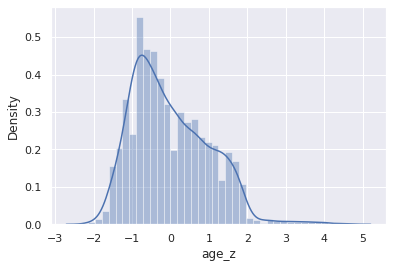

In [55]:
# YOUR CODE HERE
#raise NotImplementedError()
sns.distplot(bank['age_z'])

2. __Find the outliers of the age column in which $|age\_z| > 3$. Assign the results to a variable `bank_outliers`.__ (3 points) 

You may only include the `age`, and `age_`z columns in the output. 

Hint: you can use a pandas DataFrame's `query()` method.

In [56]:
# YOUR CODE HERE
#raise NotImplementedError()
bank_outliers = bank.query('age_z > 3 | age_z < -3')
bank_outliers.sort_values(by="age")

,index,age,job,marital,education,default,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housing_no,housing_unknown,housing_yes,y,education_numeric,age_z
3875,3875,72,retired,divorced,basic.4y,no,no,cellular,aug,mon,...,92.201,-31.4,0.861,5076.2,1,0,0,no,4.0,3.092130
1363,1363,72,retired,divorced,university.degree,no,no,cellular,aug,tue,...,92.201,-31.4,0.884,5076.2,1,0,0,no,16.0,3.092130
1489,1489,73,retired,married,professional.course,no,no,cellular,aug,thu,...,92.201,-31.4,0.873,5076.2,0,0,1,no,12.0,3.189103
3970,3970,73,retired,married,basic.4y,no,no,cellular,mar,mon,...,93.369,-34.8,0.646,5008.7,0,0,1,no,4.0,3.189103
450,450,73,retired,married,university.degree,no,no,cellular,mar,fri,...,92.843,-50.0,1.531,5099.1,0,0,1,yes,16.0,3.189103
4034,4034,74,retired,married,university.degree,no,yes,cellular,aug,wed,...,92.201,-31.4,0.854,5076.2,0,0,1,yes,16.0,3.286076
537,537,74,retired,married,university.degree,no,no,telephone,oct,mon,...,94.601,-49.5,0.977,4963.6,1,0,0,no,16.0,3.286076
2767,2767,74,retired,divorced,high.school,no,yes,telephone,dec,mon,...,92.713,-33.0,0.715,5023.5,0,0,1,no,12.0,3.286076
128,128,75,retired,married,basic.4y,no,no,cellular,apr,tue,...,93.075,-47.1,1.405,5099.1,1,0,0,yes,4.0,3.383050
750,750,75,retired,married,university.degree,no,no,cellular,jul,thu,...,94.215,-40.3,0.810,4991.6,0,0,1,yes,16.0,3.383050


In [57]:
assert bank_outliers.shape[0] == 32

In [58]:
assert bank_outliers.sort_values(by="age").reset_index().loc[0, 'age'] == 72

## Question 10. Summarize your work and save the cleaned data (4 points)

Although you can apply this notebook to the full bank marketing data, a good practice (at least from my perspective) is to assemble the code you have developed into a python module. Later on, when you have a new data sets, you can simply import that python module and use one command to preprocess the new data sets. Since you have already practiced this approach in ps01, in this question, you can just design the function's prototype.

1. __Abstract a python function for the cleaning task you have just done.__

Define the function prototype and specify the input and output of this function and document the arguments of the function. 

You don't need to implement the code. Instead, just simply add a `pass` statement in the function body.

In [59]:
# YOUR CODE HERE
#raise NotImplementedError()
def cleanData(data):
    pass
    return bank

__Congratulations! You have just completed Part A of PS02.__